# **19-Fourier series**

---

### **Introduction**

In this notebook we introduce the Fourier series associated to a function.

---

### **Author**
**Junichi Koganemaru**  

---

### **Last Updated**
**April 10, 2025**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image

In this notebook we introduce the Fourier series associated to a function. The Fourier series, and more generally the Fourier transform, is a powerful mechanism for analyzing functions and have applications in many fields, including signal processing, image processing, and data compression. First we go over some linear algebraic concepts that are useful in understanding where the Fourier series comes from.

### Prerequisites from linear algebra

#### The Euclidean inner product 

For two vectors $\boldsymbol{v},\boldsymbol{w}$ in $\R^n$, the *inner product* between them is a scalar defined to be 
$$
\mathbb{R} \ni \boldsymbol{v} \cdot \boldsymbol{w} = \sum_{i=1}^n (\boldsymbol{v})_i (\boldsymbol{w})_i.
$$
In mathematics and physics, one often uses the notation 
$$
\langle \boldsymbol{v}, \boldsymbol{w} \rangle = \boldsymbol{v} \cdot \boldsymbol{w}
$$
to denote the inner product. The (real) inner product can be thought of as a **bilinear map** $\langle \cdot, \cdot \rangle : \R^n \times \R^n \to \R$ that is linear in both arguments. 

From linear algebra, one learns that the geometry of $\mathbb{R}^n$ is essentially encoded in the inner product. Below we summarize some key facts.

1. The length or the norm of a vector is the square root of its inner product with itself: $\|\boldsymbol{v}\| = \sqrt{\boldsymbol{v} \cdot \boldsymbol{v} }$. 
2. The norm satisfies four main properties. 
    - Positivity: $\|\boldsymbol{v}\| \ge 0$ for all vectors $\boldsymbol{v}$. 
    - Positive-definiteness: $\|\boldsymbol{v}\| = 0$ if and only if $\boldsymbol{v} = 0$.
    - Homogeneity: $\|c\boldsymbol{v}\| = |c| \|\boldsymbol{v}\|$ for any scalar $c \in \mathbb{R}$. 
    - The triangle inequality: $\|\boldsymbol{v} + \boldsymbol{w}\| \le \|\boldsymbol{v}\| + \|\boldsymbol{w}\|$.
3. The angle $\theta \in [0,\pi]$ between two non-zero vectors $\boldsymbol{v},\boldsymbol{w}$ is determined by the equation $$\cos \theta = \frac{\boldsymbol{v}\cdot \boldsymbol{w}}{\|\boldsymbol{v}\| \|\boldsymbol{w}\|}.$$
4. Two vectors are orthogonal if and only if $\boldsymbol{v}\cdot \boldsymbol{w} = 0$.
5. The inner product between two vectors satisfies the Cauchy-Schwartz inequality:
   $$
   |\boldsymbol{v} \cdot \boldsymbol{w}| \le \|\boldsymbol{v}\| \|\boldsymbol{w}\|
   $$
   
#### Decomposition formula with respect to an orthonormal basis

A set of vectors $\{\boldsymbol{q}_1, \ldots , \boldsymbol{q}_n\} \subset \mathbb{R}^n$ is said to be an **orthonormal basis** for $\mathbb{R}^n$ if they are mutually orthogonal to each other and they all have length 1. In other words, 
$$
\boldsymbol{q}_i \cdot \boldsymbol{q}_j = 
\begin{cases}
1, & i = j \\
0, & i \neq j
\end{cases}, \quad 1 \leq i, j \leq n.
$$

A fundamental result from linear algebra is the following: $\boldsymbol{q}_1, \ldots, \boldsymbol{q}_n$ form an orthonormal basis for $\mathbb{R}^n$, then any vector $\boldsymbol{b} \in \mathbb{R}^n$ can be written as 
$$
\boldsymbol{b} = \text{proj}_{\boldsymbol{q}_1} \boldsymbol{b} + \ldots + \text{proj}_{\boldsymbol{q}_n} \boldsymbol{b} = (\boldsymbol{q}_1 \cdot \boldsymbol{b}) \boldsymbol{q}_1 + \ldots + (\boldsymbol{q}_n \cdot \boldsymbol{b}) \boldsymbol{q}_n.
$$

**Remark:** The geometric interpretation of $\text{proj}_{\boldsymbol{q}_j} \boldsymbol{b} = (\boldsymbol{q}_j \cdot \boldsymbol{b}) \boldsymbol{q}_j$ is that it is the projection of $\boldsymbol{b}$ onto the line spanned by $\boldsymbol{q}_j$. To see why this is true, we consider asking for what scalar $c \in \mathbb{R}$ would the vector $\boldsymbol{b} - c \boldsymbol{q}_j$ be orthogonal to $\boldsymbol{q}_j$. This is equivalent to asking for what $c$ would the inner product $\langle \boldsymbol{b} - c \boldsymbol{q}_j, \boldsymbol{q}_j \rangle = 0$. This gives us the equation
$$
\langle \boldsymbol{b}, \boldsymbol{q}_j \rangle - c \langle \boldsymbol{q}_j, \boldsymbol{q}_j \rangle = 0.
$$
Since $\langle \boldsymbol{q}_j, \boldsymbol{q}_j \rangle = 1$, we have that $c = \langle \boldsymbol{b}, \boldsymbol{q}_j \rangle$. Thus, the projection of $\boldsymbol{b}$ onto the line spanned by $\boldsymbol{q}_j$ is given by $\text{proj}_{\boldsymbol{q}_j} \boldsymbol{b} = \langle \boldsymbol{b}, \boldsymbol{q}_j \rangle \boldsymbol{q}_j$. 



The decomposition formula is essentially saying that the original vector $\boldsymbol{b}$ can be *reconstructed* by adding up the projections of $\boldsymbol{b}$ onto the lines spanned by the orthonormal basis vectors.

This is essentially the idea behind the Fourier series: a function $f$ can be "reconstructed" by adding up the "projections" of $f$ onto the orthonormal basis functions, in a suitable sense. 

In order to make sense of this, we first need to specify what types of functions we are working with, and in what sense we are taking this projection. This leads the the notion of **square integrable functions** and the **$L^2$ inner product**.


### Square integrable functions and the inner product

For the sake of simplicity, we will assume for now that we are working with functions defined over the interval $[0,2 \pi]$. Later we will generalize this to other types of domains. We first define the space of square integrable functions over the interval $[0,2\pi]$ as follows.

> **Definition** Let $f:I \to \mathbb{R}$ be a function, where $I \subseteq [0,2\pi]$. We say that $f$ is **square-integrable** whenever the following Riemann integral is well-defined and finite:
> $$
> \int_0^{2\pi} |f(x)|^2 dx < \infty.
> $$

> **Example** Any continuous function over $[0,2\pi]$ is square integrable. 

> **Example** Any piece-wise continuous function over $[0,2\pi]$ is square integrable. Note that for piece-wise continuous functions, we only allow for a finite number of jump discontinuities.

> **Example** The function $f:(0,2\pi] \to \mathbb{R}$ defined by $f(x) = \frac{1}{x}$ is not square integrable. 

> **Example** Let $p \in \mathbb{R}$. The function $f:(0,2\pi] \to \mathbb{R}$ defined via $f(x) = \frac{1}{x^p}$ is square integrable iff. $2p < 1$ by the $p$-test. 

**Remark:** This definition is a somewhat simplified version of the standard definition of [square integrable functions](https://en.wikipedia.org/wiki/Square-integrable_function) in practice, partially because one typically uses the Lebesgue integral instead of the Riemann integral in practice. Developing the Lebesgue integral requires machinery outside the scope of this course. For practical applications, defining this in terms the Riemann integral is typically sufficient. 

Throughout this notebook will use the notation $L^2([0,2\pi];\R)$ to denote the set of square integrable functions, though one should keep in mind that technically this is different from the standard definition of $L^2([0,2\pi]; \mathbb{R})$ used in practice.

**Remark** The notation $L^2$ comes from the study of [$L^p$ spaces](https://en.wikipedia.org/wiki/Lp_space), which is a class of function spaces studied in functional analysis. The letter $L$ is typically attributed to Henri Lebesgue (1875-1941), who developed the theory of the Lebesgue integral in his PhD thesis in 1902. $L^2$ ends up being special as it is the only **Hilbert space** in the family of $L^p$ spaces, and is extensively used in applications. For example, $L^2$ ends up being the natural space to use for the axiomatic formulation of quantum mechanics.

#### The $L^2$ inner product

It turns out that we can define an inner product on $L^2([0,2\pi])$, which one can think of as the generalization of the Euclidean inner product to functions. 

> **Definition (The $L^2$ inner product)** The inner product of two square integrable functions $f,g \in L^2([0,2\pi];\mathbb{R})$ is given by  
> $$  
> \langle f, g \rangle := \int_0^{2\pi} f(x) g(x) \; dx, \quad x \in [0, 2\pi].  
> $$  
> This is referred to as the *$L^2$-inner product*. The norm of a function $f \in L^2([0,2\pi];\mathbb{R})$ is then given by  
> $$  
> \|f\|_{L^2} := \sqrt{\langle f, f \rangle} = \left( \int_0^{2\pi} |f(x)|^2 \; dx \right)^{\frac{1}{2}}, \quad x \in [0, 2\pi].  
> $$  

Once we fix an inner product, we can try to identify an orthonormal basis for $L^2$. It turns out that the functions 
$$
\frac{1}{\sqrt{2\pi}}, \frac{\cos(x)}{\sqrt{\pi}}, \frac{\sin(x)}{\sqrt{\pi}}, \frac{\cos(2x)}{\sqrt{\pi}}, \frac{\sin(2x)}{\sqrt{\pi}}, \ldots, \quad x \in [0, 2\pi]
$$
form a family of functions that are mutually orthogonal and have length 1, with respect to the $L^2$-inner product defined above.

**Remark:** The basis functions can be different depending on the choice of the inner product, and also the domain for which the functions are defined over.



Now we are ready to write down the Fourier series of a function in $L^2([0,2\pi])$. If we follow the decomposition formula in $\R^n$, the analogous decomposition formula in $L^2([0,2\pi]; \mathbb{R})$ should be given by
$$
f(x) = \left\langle f, 	\frac{1}{\sqrt{2\pi} } \right\rangle 	\frac{1}{\sqrt{2\pi} } + \left\langle f,  \frac{\cos(\cdot)}{\sqrt{\pi} }  \right\rangle  \frac{\cos(x)}{\sqrt{\pi} }  +  \left\langle f,  \frac{\sin(\cdot)}{\sqrt{\pi} }  \right\rangle  \frac{\sin(x)}{\sqrt{\pi} }  + \ldots, \quad x \in [0, 2\pi].
$$

The expression on the right-hand side is what we call the Fourier series of $f$. We note, however, that unlike the decomposition formula in $\mathbb{R}^n$, we have an infinite series on the right hand side. This means that we need to consider convergence properties of the series. This ends up being [highly non-trivial](https://en.wikipedia.org/wiki/Convergence_of_Fourier_series), and is a major topic of study in what is known as [Fourier analysis](https://en.wikipedia.org/wiki/Fourier_analysis) and [Harmonic analysis](https://en.wikipedia.org/wiki/Harmonic_analysis). 

In fact, through examples that we will study below, in general the convergence is **not** pointwise, meaning that one can functions $f$ and values $x \in [0, 2\pi]$ for which
$$
f(x) \neq \lim_{N \to \infty} \left\langle f, 	\frac{1}{\sqrt{2\pi} } \right\rangle 	\frac{1}{\sqrt{2\pi} } + \left\langle f,  \frac{\cos(\cdot)}{\sqrt{\pi} }  \right\rangle  \frac{\cos(x)}{\sqrt{\pi} }  +  \left\langle f,  \frac{\sin(\cdot)}{\sqrt{\pi} }  \right\rangle  \frac{\sin(x)}{\sqrt{\pi} }  + \ldots + \left\langle f,  \frac{\cos(Nx)}{\sqrt{\pi} }  \right\rangle  \frac{\cos(Nx)}{\sqrt{\pi} }  +  \left\langle f,  \frac{\sin(Nx)}{\sqrt{\pi} }  \right\rangle  \frac{\sin(Nx)}{\sqrt{\pi} }
$$


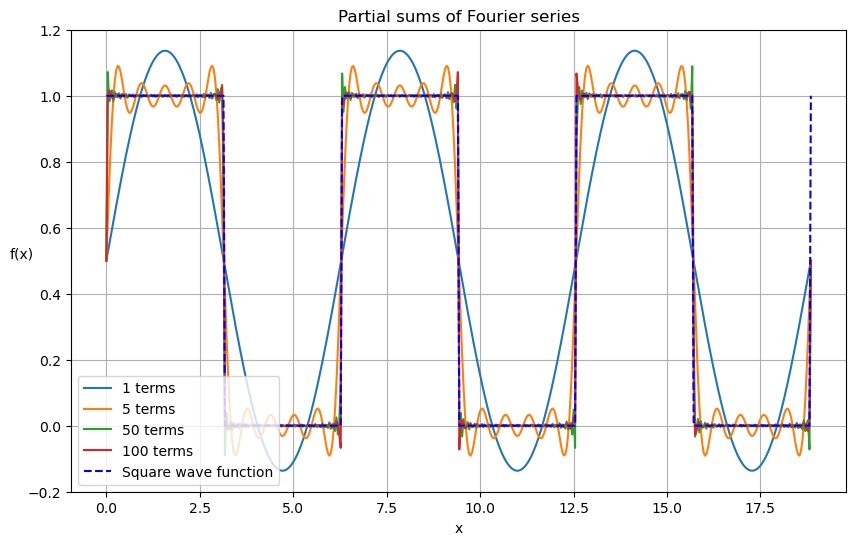

In [6]:
def square_wave(x, periods=3):
    x_mod = np.mod(x, 2 * np.pi)  
    return np.where(x_mod < np.pi, 1, 0)

def fourier_partial_sum_square(x, n_terms, periods=3):
    partial_sum = 0.5  
    count = 0
    n = 1
    while count < n_terms:
        bn = 2 / (np.pi * n) 
        partial_sum += bn * np.sin(n * x)
        count += 1
        n += 2  
    return partial_sum

x = np.linspace(0, 2 * np.pi * 3, 500)  
n_terms_list = [1,  5, 50, 100]

plt.figure(figsize=(10, 6))
for n_terms in n_terms_list:
    plt.plot(x, fourier_partial_sum_square(x, n_terms), label=f'{n_terms} terms')

plt.plot(x, square_wave(x), 'b--', label='Square wave function')
plt.xlabel('x')
plt.ylabel('f(x)', rotation=0)
plt.title('Partial sums of Fourier series')
plt.legend(loc = 'lower left')
plt.grid()
plt.show()


We note that the highly oscillatory behavior observed at the boundary is generic in the presence of discontinuities and is known as [**Gibbs phenomenon**](https://en.wikipedia.org/wiki/Gibbs_phenomenon). 

It is also worth noting that square integrable functions need not be differentiable, yet all the basis functions utilized in the Fourier series are smooth. 

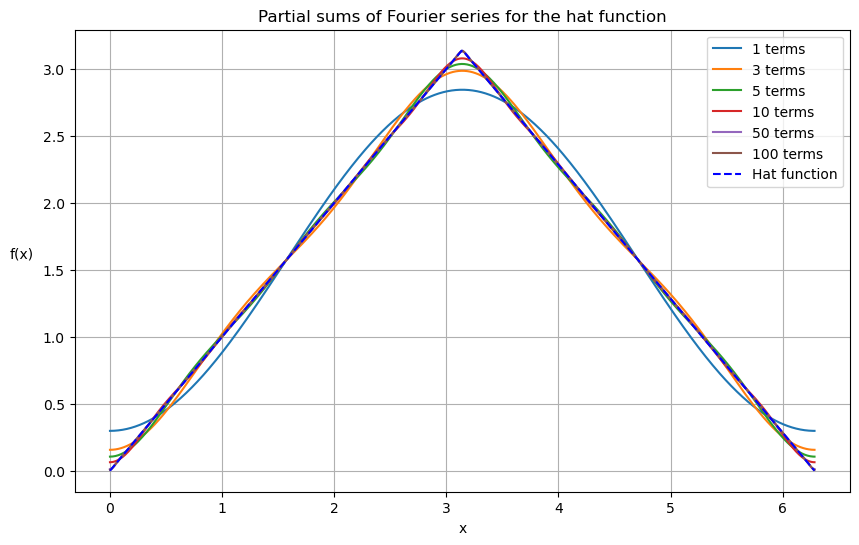

In [17]:
def hat_function(x):
    return np.where(x <= np.pi, x, 2 * np.pi - x)

def fourier_partial_sum_hat(x, n_terms, L):
    a0 = L  
    partial_sum = a0 / 2 
    for k in range(1, n_terms + 1):
        ak = (2 * L / (np.pi**2)) * (((-1)**k - 1) / (k**2))
        partial_sum += ak * np.cos(k * np.pi * x / L)
    return partial_sum

x = np.linspace(0, 2 * np.pi, 500)
n_terms_list = [1, 3, 5, 10, 50, 100]
L = np.pi  

plt.figure(figsize=(10, 6))
for n_terms in n_terms_list:
    plt.plot(x, fourier_partial_sum_hat(x, n_terms, L), label=f'{n_terms} terms')


plt.plot(x, hat_function(x), 'b--', label='Hat function')
plt.xlabel('x')
plt.ylabel('f(x)', rotation=0, labelpad=15)
plt.title('Partial sums of Fourier series for the hat function')
plt.legend()
plt.grid()
plt.show()


Historically, this was a major motivation for the development of many parts of real analysis, where mathematicians realized that the notion of convergence of infinite series is delicate and requires careful treatment. Many important concepts in real analysis were discovered partially from the study of Fourier series, including the notion of [uniform convergence](https://en.wikipedia.org/wiki/Uniform_convergence). 

To clean up the notation a bit, we record the following definition. 

> **Definition (Fourier series over $[0,2\pi]$)**  
> Let $f: [0,2\pi] \to \mathbb{R}$ be a square integrable function. Then the *Fourier series* of $f$ is the infinite sum  
> $$  
> \frac{a_0}{2} + a_1 \cos(x) + b_1 \sin(x) + a_2 \cos(2x) + b_2 \sin(2x) + \ldots, \quad x \in [0, 2\pi],  
> $$  
> where  
> $$  
> a_n = \frac{1}{\pi} \int_0^{2\pi} f(x) \cos(nx) \; dx, \quad n \ge 0,  
> $$  
> $$  
> b_n = \frac{1}{\pi} \int_0^{2\pi} f(x) \sin(nx) \; dx, \quad n \ge 1.  
> $$  
> $a_n$ and $b_n$ are referred to as the *Fourier coefficients* of $f$. We typically write 
> $$
> f(x) \sim \frac{a_0}{2} + a_1 \cos(x) + b_1 \sin(x) + a_2 \cos(2x) + b_2 \sin(2x) + \ldots, \quad x \in [0, 2\pi],
> $$
> to denote that the series on the RHS is the Fourier series of $f$. 

**Remark:** This is the definition of the Fourier series over $[0,2\pi]$. The formulas for the coefficients will change over different intervals.

**Remark:** We note that we are not writing that $f$ equals the Fourier series, as the series may not converge to $f$ pointwise.

> **Example**  
> Consider the function $f: [0,2\pi] \to \mathbb{R}$ defined via $f(x) = x$. One can compute its Fourier coefficients to show that the Fourier series of $f$ is given by
> $$  
> \pi - \sum_{n=1}^\infty \frac{2}{n} \sin(n x), \quad x \in [0, 2\pi].  
> $$  
> Heuristically, we want to say that  
> $$  
> x = \pi - \sum_{n=1}^\infty \frac{2}{n} \sin(n x), \quad x \in [0, 2\pi].  
> $$  
> Though, notice that there's something wrong with the equality above if we try to understand it in the usual sense: if $x = 0$ or $x = 2\pi$, then this suggests that  
> $$  
> 0 = \pi - 0 = \pi,  
> $$  
> and  
> $$  
> 2\pi = \pi - 0 = \pi.  
> $$  
> The issue here is related to the convergence of the infinite sum. When we write  
> $$  
> f(x) = \frac{a_0}{2} + a_1 \cos(x) + b_1 \sin(x) + a_2 \cos(2x) + b_2 \sin(2x) + \ldots, \quad x \in [0, 2\pi],  
> $$  
> what we mean by equality here is that if we define the partial sums of the Fourier series $S_N(x)$ via  
> $$  
> S_N(x) = \frac{a_0}{2} + \sum_{n=1}^N \left(a_n \cos(nx) + b_n \sin(nx)\right), \quad x \in [0, 2\pi],  
> $$  
> then  
> $$  
> \|f - S_N\|_{L^2} \to 0 \quad \text{as } N \to \infty.  
> $$  
> But this is with respect to the norm generated by the $L^2$-inner product, not the usual Euclidean norm. So when we wrote that $f$ is equal to its Fourier series, what we really meant was that they are equal *with respect to the $L^2$-inner product*. They are not necessarily equal to each other pointwise for every $x$.  


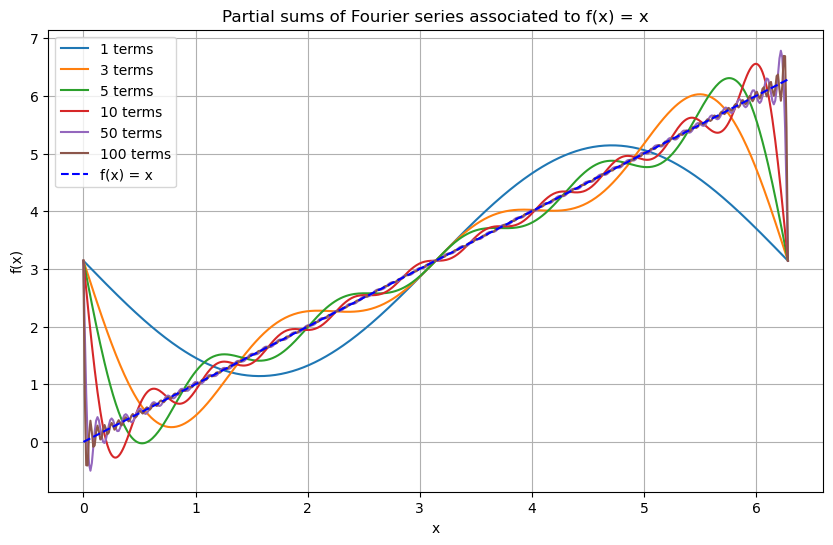

In [3]:
x = np.linspace(0, 2 * np.pi, 500)
f = x

def fourier_partial_sum(x, n_terms):
    partial_sum = np.pi  # a_0 / 2
    for k in range(1, n_terms + 1):
        b_k = -2 / k
        partial_sum += b_k * np.sin(k * x)
    return partial_sum

plt.figure(figsize=(10, 6))
n_terms_list = [1, 3, 5, 10, 50, 100]

for n_terms in n_terms_list:
    plt.plot(x, fourier_partial_sum(x, n_terms), label=f'{n_terms} terms')

plt.plot(x, f, 'b--', label='f(x) = x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Partial sums of Fourier series associated to f(x) = x')
plt.legend()
plt.grid()
plt.show()

We can also record the more general version of the Fourier series over an interval $[0,L]$, where $L$ is a positive real number.
> **Definition (Fourier series over $[0,L]$)**  
> Let $L > 0$ and let $f: [0,L] \to \mathbb{R}$ be a square integrable function. Then the *Fourier series* of $f$ is the infinite sum  
> $$  
> \frac{a_0}{2} + a_1 \cos\left(\frac{2\pi x}{L}\right) + b_1 \sin\left(\frac{2\pi x}{L}\right) + a_2 \cos\left(\frac{4\pi x}{L}\right) + b_2 \sin\left(\frac{4\pi x}{L}\right) + \ldots, \quad x \in [0, L],  
> $$  
> where  
> $$  
> a_n = \frac{2}{L} \int_0^L f(x) \cos\left(\frac{2\pi n x}{L}\right) \; dx, \quad n \ge 0,  
> $$  
> $$  
> b_n = \frac{2}{L} \int_0^L f(x) \sin\left(\frac{2\pi n x}{L}\right) \; dx, \quad n \ge 1.  
> $$  
> $a_n$ and $b_n$ are referred to as the *Fourier coefficients* of $f$. We typically write 
> $$
> f(x) \sim \frac{a_0}{2} + a_1 \cos\left(\frac{2\pi x}{L}\right) + b_1 \sin\left(\frac{2\pi x}{L}\right) + a_2 \cos\left(\frac{4\pi x}{L}\right) + b_2 \sin\left(\frac{4\pi x}{L}\right) + \ldots, \quad x \in [0, L],
> $$
> to denote that the series on the RHS is the Fourier series of $f$. 


### Pointwise convergence of the Fourier series

Now, one could ask when a square integrable function and its Fourier series agree at a point $x \in [0,2\pi]$. This turns out to be a somewhat delicate issue, but the answer is quite satisfactory: one can show that a square integrable function and its Fourier series agree ``almost everywhere," but to be precise about what this means we would need to introduce some ideas from [measure theory](https://en.wikipedia.org/wiki/Measure_(mathematics)), which once again is outside the scope of this course. 

Convergence of Fourier series of more general functions is studied as a part of [Fourier analysis](https://en.wikipedia.org/wiki/Fourier_analysis) and [Harmonic analysis](https://en.wikipedia.org/wiki/Harmonic_analysis). 

For piecewise smooth functions (functions that are smooth on a finite number of subintervals), we have the following result.

> **Theorem (The Fourier convergence theorem)**  
> Let $L > 0$ and suppose $f: [0,L) \to \mathbb{R}$ is a piecewise smooth function. For technical reasons, we think of 0 and $L$ as the "same point" by "gluing" them together. Then at the points of continuity, we have $S_N(x) \to f(x)$ pointwise as $N \to \infty$. At the points of discontinuity, we have  
> $$  
> S_N(x_0) \to \frac{f(x_0^+) + f(x_0^-)}{2}, \quad x_0 \in [0, L],  
> $$  
> where  
> $$  
> f(x_0^+) = \lim_{x \to x_0^+} f(x), \quad f(x_0^-) = \lim_{x \to x_0^-} f(x), \quad x_0 \in [0, L].  
> $$  
> In other words, the Fourier series converges to the average value at the points of discontinuity.

In the previous example, the Fourier series converges to the average value of $f(0)$ and $\lim\limits_{x \to 2\pi^-} f(x)$ at $0$ and $2\pi$, which is $\pi$.

### Fourier series over $[-L,L]$

Fix $L > 0$. For functions defined over $[-L, L]$, we use the inner product 
$$
\langle f(x), g(x) \rangle = \int_{-L}^L f(x)g(x) \; dx, \quad x \in [-L, L].
$$
The corresponding orthonormal basis for $L^2([-L,L];\mathbb{R})$ with respect to this inner product is 
$$
\frac{1}{\sqrt{2L}}, \frac{\cos(x)}{\sqrt{L}}, \frac{\sin(x)}{\sqrt{L}}, \frac{\cos(2x)}{\sqrt{L}}, \frac{\sin(2x)}{\sqrt{L}}, \ldots, \quad x \in [-L, L].
$$
This leads to the analogous definition of the Fourier series for $L^2([-L,L];\mathbb{R})$.

> **Definition**  
> Let $f: [-L,L] \to \mathbb{R}$ be a piecewise smooth function. Then the Fourier series of $f$ is defined as the infinite series
> $$  
> \frac{a_0}{2} + \sum_{n=1}^\infty a_n \cos \left( \frac{n \pi}{L} x \right) + b_n \sin \left( \frac{n \pi}{L} x \right), \quad x \in [-L, L]  
> $$  
> with  
> $$  
> a_0 = \frac{1}{L} \int_{-L}^L f(x) \; dx, \quad x \in [-L, L]  
> $$  
> $$  
> a_n = \frac{1}{L} \int_{-L}^L f(x) \cos \left( \frac{n \pi}{L} x \right) \; dx, \quad x \in [-L, L]  
> $$  
> $$  
> b_n = \frac{1}{L} \int_{-L}^L f(x) \sin \left( \frac{n \pi}{L} x \right) \; dx, \quad x \in [-L, L],  
> $$  

Analogously, we can write 
$$
f(x) \sim \frac{a_0}{2} + \sum_{n=1}^\infty a_n \cos \left( \frac{n \pi}{L} x \right) + b_n \sin \left( \frac{n \pi}{L} x \right), \quad x \in [-L, L],
$$
and sometimes
$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^\infty a_n \cos \left( \frac{n \pi}{L} x \right) + b_n \sin \left( \frac{n \pi}{L} x \right), \quad x \in [-L, L],
$$
where the equality is understood in the sense of the Fourier convergence theorem. We note that in applying the Fourier convergence theorem, we think of $-L$ and $L$ as the same point by "gluing" them together. So if $f(-L) \neq f(L)$, then the Fourier series converges to the average value of $f(-L)$ and $f(L)$ at the points $-L$ and $L$.

### Periodic extensions via the Fourier series

Note that since the orthonormal basis functions are periodic, the associated Fourier series can actually be viewed as a periodic function on $\R$. For this reason not only does the Fourier series give a representation of the original function $f$ over $[-L,L]$ (or $[0,L]$), it also gives a *periodic extension* of the original function over $\R$.


The following examples of taken from Differential Equations with Boundary Value Problems by Zill and Wright. 


> **Example** 
> Consider the function $f: [-\pi,\pi] \to \mathbb{R}$ defined via
> $$
> f(x) =
> \begin{cases}
> 0, x \in [-\pi,0] \\
> x - \pi, x \in (0,\pi].
> \end{cases}
> $$
> We note that there is a jump discontinuity at $x = 0$, so by the Fourier convergence theorem the Fourier series converges to the average of the left and right limits at $x=0$, at multiples of $2 \pi$. A sketch of the Fourier series of $f$ is shown below.
>
> <div style="text-align: center;">
>     <img src="./diagrams/series1.png" alt="Fourier series" style="width: 38%;">
> </div>


> **Example** 
> Consider the function $f: [-2,2] \to \mathbb{R}$ defined via
> $$
> f(x) = x
> $$
> We note that since we want to think of $-2$ and $2$ as the "same point", we have a jump discontinuity in the Fourier series at multiples of $2$ since $f(-2) \neq f(2)$. By the Fourier convergence theorem, the Fourier series converges to the average of these two values. A sketch of the Fourier series of $f$ is shown below.
>
> <div style="text-align: center;">
>     <img src="./diagrams/series2.png" alt="Fourier series" style="width: 46%;">
> </div>


### Fourier sine and cosine series

#### Symmetry of odd and even functions

Recall that a function $f$ is even over $[-L,L]$ if 
$$
f(-x) = f(x), \quad x \in [-L, L]
$$
and odd if 
$$
f(-x) = -f(x), \quad x \in [-L, L].
$$

Examples of odd functions are 
$$
\frac{\sin(x)}{\sqrt{L}}, \quad \frac{\sin(2x)}{\sqrt{L}}, \quad \ldots, \quad x \in [-L, L]
$$
and examples of even functions are 
$$
\frac{1}{\sqrt{2L}}, \quad \frac{\cos(x)}{\sqrt{L}}, \quad \frac{\cos(2x)}{\sqrt{L}}, \quad \ldots, \quad x \in [-L, L]
$$

If $f$ is an even function over $[-L,L]$, then 
$$
\int_{-L}^L f(x) \, dx = 2 \int_0^L f(x) \, dx.
$$
If $f$ is an odd function, then 
$$
\int_{-L}^L f(x) \, dx = 0.
$$

Furthermore 
- The product of an even function and an even function is an even function.
- The product of an odd function and an even function is an odd function.
- The product of an odd function and an odd function is an odd function.

#### Fourier sine and cosine series 
This shows that if $f$ is an odd function over $[-L,L]$, then the Fourier series of $f$ reduces to a **Fourier sine series**

$$
\sum_{n=1}^\infty b_n \sin\left(\frac{n \pi}{L} x\right), \quad x \in [-L, L]
$$

with

$$
b_n = \frac{2}{L} \int_{0}^{L} f(x) \sin\left(\frac{n \pi}{L} x\right) \, dx, \quad x \in [0,L]
$$

Analogously, if $f$ is even then its Fourier series reduces to a **Fourier cosine series**

$$
\frac{a_0}{2} + \sum_{n=1}^\infty a_n \cos\left(\frac{n \pi}{L} x\right), \quad x \in [-L, L],
$$
with 
$$
a_0 = \frac{2}{L} \int_{0}^{L} f(x) \, dx, \quad x \in [0,L]
$$
and 
$$
a_n = \frac{2}{L} \int_{0}^{L} f(x) \cos\left(\frac{n \pi}{L} x\right) \, dx, \quad x \in [0,L], n \ge 1.
$$




### Half-range Fourier series

We note that by utilizing the symmetry properties of odd and even functions over $[-L,L]$, one can define the associated **sine and cosine Fourier series** for a function $f$ defined on $[0,L]$, by first considering an *extension* of $f$ into $[-L,L]$ and then computing its Fourier series.

The Fourier series will converge on $[-L,L]$ (in particular on $[0,L]$) in the sense of the Fourier convergence theorem.

We will consider two types of extensions: even extensions and odd extensions. Given a function $f$ defined on $[0,L]$,

- we define an **even extension** $\tilde{f}: [-L,L] \to \mathbb{R}$ via
    $$
    \tilde{f}(x) = \begin{cases}
        f(x), & x \in [0,L] \\
        f(-x), & x \in [-L,0]
    \end{cases}
    $$ 
    In this case, $\tilde{f}$ is an even function on $[-L,L]$, so its Fourier series reduces to a cosine series.

-  we define an **odd extension** $\tilde{f}: [-L,L] \to \mathbb{R}$ via
    $$
    \tilde{f}(x) = \begin{cases}
        f(x), & x \in [0,L] \\
        -f(-x), & x \in [-L,0]
    \end{cases}
    $$ 
    In this case, $\tilde{f}$ is an odd function over $[-L,L]$, so its Fourier series reduces to a sine series.

The associated Fourier sine or cosine series are sometimes referred to as [**half-range Fourier series**](https://en.wikipedia.org/wiki/Half_range_Fourier_series).

The following example is taken from Differential Equations with Boundary Value Problems by Zill and Wright.

> **Example**
> Consider the function $f: [0,L] \to \mathbb{R}$ defined via $f(x) = x^2$. A rough sketch of the half-range cosine and sine series of $f$ is shown below.
>
> <div style="text-align: center;">
>     <img src="./diagrams/half.png" alt="Half range Fourier series" style="width: 40%;">
> </div>


For reasons we will see in the next book, the half-range sine series will be particularly useful for solving certain types of differential equations. We summarize this in the following theorem.

> **Theorem:** Let $f$ be a square integrable function defined on the interval $[0, L]$. Then one can write the following Fourier sine series representation:  
>   
> $$  
> f(x) = \sum_{n=1}^\infty b_n \sin\left(\frac{n \pi}{L} x\right), \quad x \in [0, L]  
> $$  
>   
> where equality is understood in the sense of the Fourier convergence theorem, with the Fourier coefficients of $f$ given by  
>   
> $$  
> b_n = \frac{2}{L} \int_0^L f(x) \sin\left(\frac{n \pi}{L} x\right) \; dx, \quad x \in [0, L]  
> $$

### Fourier series in terms of complex exponentials

Note that by utilizing the Euler formula, we can rewrite the Fourier series in terms of complex exponentials. For example, for $f \in L^2([0,L];\mathbb{R})$, we can write the Fourier series in a more compact way as
$$
f(x) \sim \sum_{n=-\infty}^\infty c_n e^{2\pi i n x / L}, \quad x \in [0, 2\pi],
$$
where the Fourier coefficients are given by
$$
\mathbb{C} \ni c_n = \int_0^{L} f(x) e^{-2 \pi i n x/L} \; dx, \quad n \in \mathbb{Z}.
$$
This version is also useful as it allows us to extend the notion of the Fourier series to complex-valued functions. For real-valued functions, one can show that this is equivalent to the Fourier series we wrote down above.

### Applications of the Fourier series

**Remark:** The notes below are written purely to showcase the many useful applications of the Fourier series and related ideas. They are not related to differential equations (at least not immediately) and you are not responsible for knowing them.

Fourier series have a wide range of applications in mathematics, physics, and engineering. Some of the most common applications include the following.

1. **Signal processing**: Fourier series are used to analyze, approximate, and synthesize signals in the time domain. For example, the Fourier series can be used to decompose a signal into its frequency components, which can be useful for filtering out noise or extracting useful information from the signal.
2. **Partial differential equations**: Fourier series can be used to solve certain linear partial differential equations with periodic boundary conditions. Some of these equations have fundamental applications to engineering and physics. We will go over some canonical examples in the next notebook.
3. **Analytic number theory**: Fourier series are used in analytic number theory to study the distribution of prime numbers and other arithmetic functions. A famous application is to use Fourier series to calculate the values of the real Riemann zeta function $\zeta: (1,\infty) \to \mathbb{R}$ defined via 
    $$
    \zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s}
    $$
    at specific values of $s$. For example, one can show that
    $$
    \zeta(2) = \sum_{n=1}^{\infty} \frac{1}{n^2} = \frac{\pi^2}{6}, \; \zeta(4) = \sum_{n=1}^{\infty} \frac{1}{n^4} = \frac{\pi^4}{90}, \; \zeta(6) = \sum_{n=1}^{\infty} \frac{1}{n^6} = \frac{\pi^6}{945}, \; \text{etc.}
    $$
4. **Isoperimetric inequalities**: Fourier series can be used to prove isoperimetric inequalities, which relate the volume of a region to the surface area of the region. 

A particularly useful variant of the Fourier series that is used in many applications is the **discrete Fourier transform** (DFT). 

> **Definition**. Let $f: \{0, 1, \dots, N-1\} \to \mathbb{C}$ be a function defined over a finite sequence of $N$ points. The **discrete Fourier transform** of $f$ is the function $\hat{f}: \{0, 1, \dots, N-1\} \to \mathbb{C}$ defined via  
> $$
> \hat{f}(k) = \sum_{j=0}^{N-1} f(x) e^{-2\pi i k j / N}.
> $$
> The inverse discrete Fourier transform is defined via
> $$
> f(j) = \frac{1}{N} \sum_{k=0}^{N-1} \hat{f}(k) e^{2\pi i k j / N}.
> $$


In general, computing the discrete Fourier transform is a computationally expensive operation, as it requires $O(N^2)$ operations to compute the matrix-vector product. The **fast Fourier transform** (FFT) is an efficient algorithm for computing the discrete Fourier transform in $O(N \log N)$ operations. The basis idea behind FFT is that DFT can be computed more efficiently if $N$ is a power of $2$. For example, if $N = 1024$, then we can write 
$$
\hat{f} = \mathbf{F}_{1024} f = \begin{pmatrix}
I_{512 \times 512} & D_{512} \\
D_{512} & I_{512 \times 512}
\end{pmatrix} \begin{pmatrix}
\mathbf{F}_{512} & 0 \\
0 & \mathbf{F}_{512}
\end{pmatrix} \begin{pmatrix}
f_{\text{even}} \\
f_{\text{odd}}
\end{pmatrix}
$$
where $f_{\text{even}}$ and $f_{\text{odd}}$ are the even and odd indexed components of $f$, respectively, and $D_{512}$ is a diagonal matrix given by 
$$
D_{512} = \begin{pmatrix}
1 & 0 & \cdots & 0 \\
0 & \omega & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \omega^{511}
\end{pmatrix}
$$
where $\omega = e^{-2\pi i / 1024}$. This identity can be proved by taking advantage of block multiplication and the block structure of the DFT matrix. This process can be repeated iteratively: $\mathbf{F}_{512}$ can be computed using $\mathbf{F}_{256}$, and so on, until we reach the base case of $N = 2$. As a result, the FFT algorithm can be implemented in $O(N \log N)$ operations. Due to the success of the FFT algorithm, it is typically synonymous with the DFT and the two terms are often used interchangeably.

### Applications of FFT: denoising signals 

The FFT algorithm is widely used in signal processing, image processing, and data analysis. One of the most common applications of the FFT is to denoise signals. The basic idea is to compute the Fourier transform of a noisy signal, remove the high-frequency components (which are typically associated with noise), and then compute the inverse Fourier transform to obtain a denoised signal.

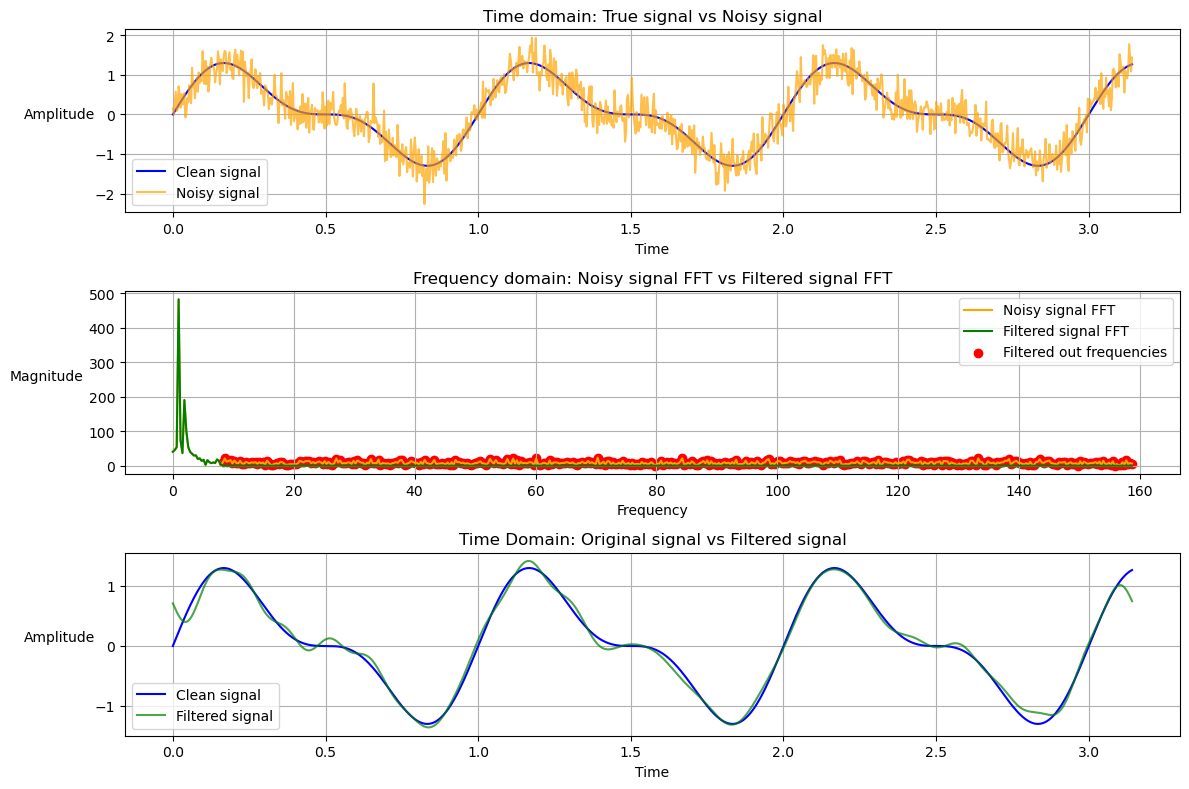

In [19]:
np.random.seed(42) 
n_points = 1000
x = np.linspace(0, np.pi, n_points)
clean_signal = np.sin(2 * np.pi * x) + 0.5 * np.sin(4 * np.pi * x)
noise = np.random.normal(0, 0.3, n_points)
noisy_signal = clean_signal + noise


fft_noisy = np.fft.fft(noisy_signal)
frequencies = np.fft.fftfreq(n_points, d=(x[1] - x[0]))

threshold = 8  
fft_filtered = fft_noisy.copy()
fft_filtered[np.abs(frequencies) > threshold] = 0

filtered_signal = np.fft.ifft(fft_filtered).real

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x, clean_signal, label="Clean signal", color="blue")
plt.plot(x, noisy_signal, label="Noisy signal", color="orange", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Amplitude", rotation=0, labelpad=25)
plt.title("Time domain: True signal vs Noisy signal")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(frequencies[:n_points // 2], np.abs(fft_noisy[:n_points // 2]), label="Noisy signal FFT", color="orange")
plt.plot(frequencies[:n_points // 2], np.abs(fft_filtered[:n_points // 2]), label="Filtered signal FFT", color="green")
plt.scatter(frequencies[:n_points // 2][np.abs(frequencies[:n_points // 2]) > threshold], 
            np.abs(fft_noisy[:n_points // 2][np.abs(frequencies[:n_points // 2]) > threshold]), 
            color="red", label="Filtered out frequencies")
plt.xlabel("Frequency")
plt.ylabel("Magnitude", rotation=0, labelpad=30)
plt.title("Frequency domain: Noisy signal FFT vs Filtered signal FFT")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(x, clean_signal, label="Clean signal", color="blue")
plt.plot(x, filtered_signal, label="Filtered signal", color="green", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Amplitude", rotation=0, labelpad=25)
plt.title("Time Domain: Original signal vs Filtered signal")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### 2D Discrete Fourier transform

The discrete Fourier transform can be extended to two dimensions, which is useful for analyzing images and other two-dimensional data. The 2D discrete Fourier transform is defined via
$$
\hat{f}(k_1, k_2) = \sum_{j_1=0}^{N_1-1} \sum_{j_2=0}^{N_2-1} f(j_1, j_2) e^{-2\pi i (k_1 j_1 / N_1 + k_2 j_2 / N_2)},
$$
where $f: \{0, 1, \ldots, N_1 - 1\} \times \{0, 1, \ldots, N_2 - 1\} \to \mathbb{C}$ is a function defined over a finite sequence of $N_1 N_2$ points. The inverse discrete Fourier transform is defined via
$$
f(j_1, j_2) = \frac{1}{N_1 N_2} \sum_{k_1=0}^{N_1-1} \sum_{k_2=0}^{N_2-1} \hat{f}(k_1, k_2) e^{2\pi i (k_1 j_1 / N_1 + k_2 j_2 / N_2)}.
$$
The 2D discrete Fourier transform can be computed efficiently using the fast Fourier transform algorithm, which is based on the same principles as the 1D discrete Fourier transform. The FFT algorithm can be applied separately to each dimension, and then combined to obtain the final result.

For example, one can first apply the 1D FFT algorithm to each row of the image, and then apply the 1D FFT algorithm to each column of the resulting matrix. The time complexity of the 2D FFT algorithm is $O(N_1 N_2 (\log N_1 N_2))$, which is significantly faster than the naive $O((N_1 N_2)^2)$ algorithm.


### Applications of the 2D FTT: image compression

The 2D FTT is extremely effective for image compression, as many of the Fourier coefficients associated to an image are small and can be discarded without significantly affecting the quality of the image. 

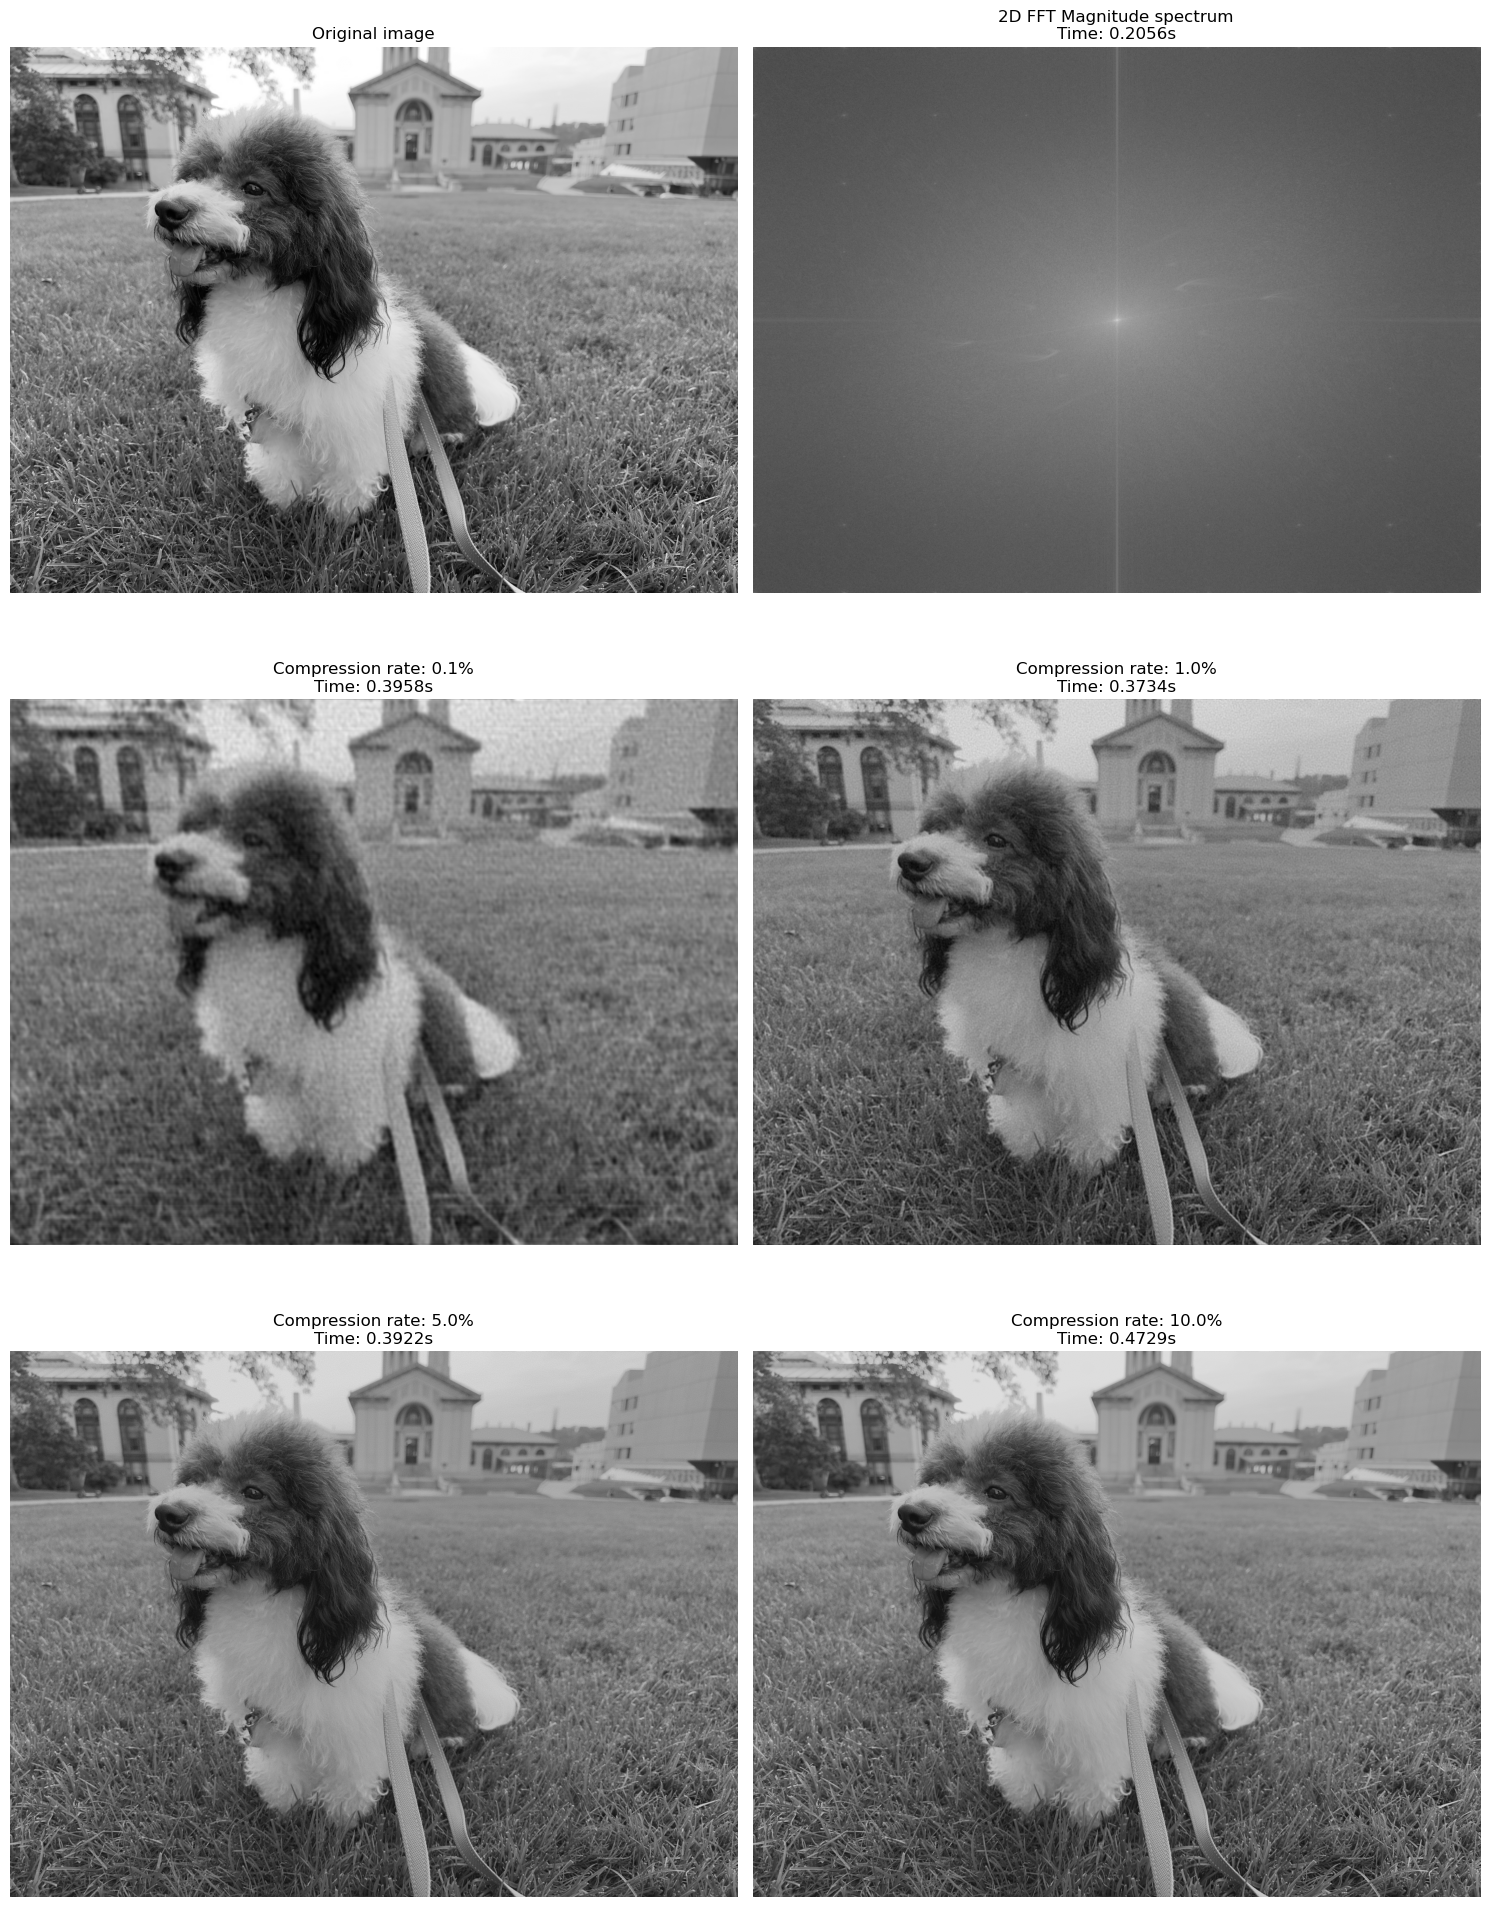

In [26]:
image_path = 'data/ollie.JPG'
image = Image.open(image_path).convert('L')  
image_array = np.array(image)

start_time_fft = time.time()
fft_image = np.fft.fft2(image_array)
fft_image_shifted = np.fft.fftshift(fft_image)  
end_time_fft = time.time()
fft_time = end_time_fft - start_time_fft

magnitude_spectrum = np.log(np.abs(fft_image_shifted) + 1)

compression_rates = [0.001, 0.01, 0.05, 0.1]
compressed_images = []
computation_times = []

for rate in compression_rates:
    start_time = time.time()
    threshold = np.percentile(np.abs(fft_image_shifted), 100 * (1 - rate))
    compressed_fft = fft_image_shifted * (np.abs(fft_image_shifted) > threshold)
    compressed_fft_shifted = np.fft.ifftshift(compressed_fft)  
    compressed_image = np.fft.ifft2(compressed_fft_shifted).real
    end_time = time.time()
    compressed_images.append(compressed_image)
    computation_times.append(end_time - start_time)

plt.figure(figsize=(15, 20))

plt.subplot(3, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title(f'2D FFT Magnitude spectrum\nTime: {fft_time:.4f}s')
plt.axis('off')

for i, (rate, compressed_image, comp_time) in enumerate(zip(compression_rates, compressed_images, computation_times)):
    plt.subplot(3, 2, i + 3)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'Compression rate: {rate * 100:.1f}%\nTime: {comp_time:.4f}s')
    plt.axis('off')

plt.tight_layout()
plt.show()

In practice, one often uses variants of the FTT for image processing and compression. For example, in the popular JPEG image compression algorithm, the discrete cosine transform (DCT) is used instead of the discrete Fourier transform. The DCT is a real-valued transform that is similar to the complex-valued discrete Fourier transform, but it has some advantages over FTT in terms of compression and computational efficiency.